# **1. Problem** **Statement**

1. Task: Prepare a complete data analysis report on the given data.
2. Task: Create a predictive model which will help the bank marketing team to know which customer will buy the product.
3. Task: Suggestions to the Bank market team to make customers buy the product.

# **2. Loading Data SET**

In [3]:
#Importing minimum required libraries
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Loading CSV file
df= pd.read_csv('/content/bank-additional-full.csv')

##***Basic Checks of the csv file***

In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
## Checking null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
## Finding unique values
for col in df.select_dtypes(include ='object').columns:
  print(col)
  print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


# **3.Domain Analysis**

***Input Varrables:***

---

1. **AGE(Num):**It refers to a numerical variable that captures the age of individuals represented in the data. This column usually contains positive integers (e.g., 25, 30, 45) that denote the age in years.
2. **Job (categorical):** This dataset represents the occupation of individuals using predefined categories, such as "admin," "services," or "student." It's a qualitative attribute used for classification and analysis.
3. **Marital (categorical):** It represents an individual's relationship status, categorized into groups like "single," "married," "divorced," or "widowed," for classification and demographic analysis purposes.
4. **Education (categorical):** It represents an individual's highest level of education, categorized into groups such as "primary," "secondary," "tertiary," or "no formal education." It's used for classification and educational analysis.
5. **Default(categorical):** It is a categorical variable indicating whether an individual has a credit account in default. It has three possible values:"no": The individual does not have any credit in default.
"yes": The individual has a credit account in default.
"unknown": The default status is not known or is missing.
This type of variable is often used in financial datasets to assess credit risk or to analyze loan performance.
6. **Housing(categorical):** It is a categorical variable that indicates whether an individual has an existing housing loan. This attribute is often found in financial or banking datasets, such as customer profiles or loan application records, to help analyze customers' financial liabilities and evaluate creditworthiness.
7. **Loan(categorical):** It is a categorical variable indicating whether an individual has an active personal loan. This attribute is commonly found in banking or financial datasets, often used to analyze customer liabilities and to determine credit risk or loan eligibility. It may be part of a broader financial dataset, like customer profiling for marketing or risk assessment in banks.
8. **Contact(categorical):** It is a categorical variable that indicates the type of communication used to reach individuals. This attribute is often found in marketing or customer interaction datasets, such as those used in bank marketing campaigns. It helps analyze the effectiveness of different communication channels in reaching customers or potential clients. This type of dataset is frequently used to evaluate customer outreach strategies and campaign performance.
9. **Month(categorical):** It is a categorical variable that indicates the month in which the last contact with an individual was made. This attribute is often found in datasets related to customer contact or marketing campaigns, such as bank marketing datasets. It helps analyze when interactions with customers occurred, which can be used to identify seasonal trends or evaluate the timing of customer engagements.
10. **Day_of_week(categorical):** It is a categorical variable that indicates the day of the week when the last contact with an individual was made.This type of variable is commonly found in datasets related to customer outreach or marketing campaigns, such as bank marketing or telemarketing datasets. It helps analyze the effectiveness of contact efforts based on the day of the week and can be used to optimize communication strategies for better results.
11. **Duration(Num):** It is a numeric variable that represents the length of the last communication with an individual, measured in seconds. This variable is significant in datasets related to customer contact or marketing campaigns, particularly in contexts such as bank marketing. Moreover, Such datasets are commonly used in predictive modeling and customer relationship management (CRM) to analyze customer engagement and assess the effectiveness of sales or marketing efforts. By analyzing contact duration alongside other attributes, businesses can better understand customer behavior and optimize their outreach strategies.
12. **Campaign(Num):**This data set is used to track the number of interactions made with a client as part of a marketing campaign, providing insights into engagement levels and the effectiveness of the outreach efforts.
13. **Pdays(Num):** It represent the number of days that have passed since the client was last contacted during a previous campaign. It is a measure of the recency of engagement with that client.
14. **Previous(Num):** It indicates the total number of contacts or interactions that were performed with the client before the current campaign. It counts all previous communications, which could include emails, phone calls, meetings, or any other form of outreach.
15. **Poutcome(categorical):** It captures the result or outcome of the previous marketing campaign that the client was involved in. It categorizes the outcome into distinct groups.
16. **Employment variation rate(Num):** It is a quarterly indicator that typically measures the percentage change in employment over a given quarter. It indicates how the level of employment has varied compared to a previous period, often the previous quarter. Policymakers, economists, and businesses often use such indicators to assess economic health and plan for future developments.
17. **Consumer price indexrepresents (Num):** It is  is a monthly indicator that tracks changes in the price of a basket of goods and services typically purchased by households. The CPI measures the average price level of a set of goods and services, often referred to as a "basket," which represents typical household expenditures. It is used to gauge inflation or deflation by comparing the current prices to a base period's prices.
18. **Consumer confidence index (Num):** It is a monthly indicator that measures the level of consumer optimism or pessimism regarding the state of the economy. Consumer Confidence Index is a key indicator that reflects the sentiment of consumers about their personal financial situation, the general economic situation, and their future expectations regarding economic conditions. It gauges consumers' willingness to spend, which is a crucial component of economic growth.
19. **Euribor 3 month(Num):** It is a daily indicator that represents the interest rate at which European banks are willing to lend to each other for a period of three months. Euribor (Euro Interbank Offered Rate) is a set of interest rates that European banks use when lending to one another. It is a key benchmark for interest rates in the Eurozone, similar to how LIBOR was used globally before its phase-out.
20. **Number of employees (Num):** It is a quarterly indicator that represents the total number of people employed during a given quarter. This numeric data reflects the workforce's size at a specific point in time.



***Output variable ***

---
21. **Y(Binary):** It is a dataset which represents the output or target variable indicating whether a client has subscribed to a term deposit.y is the target variable for models aiming to predict whether a client will subscribe to a term deposit, based on various input features (like employment status, consumer confidence, interest rates, etc.). This binary classification problem is typically solved using machine learning models such as logistic regression, decision trees, or more advanced methods like neural networks or ensemble models.

# **4.Exploratory Data Analysis**

In [11]:
## Finding categorical values
df.select_dtypes(include ='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

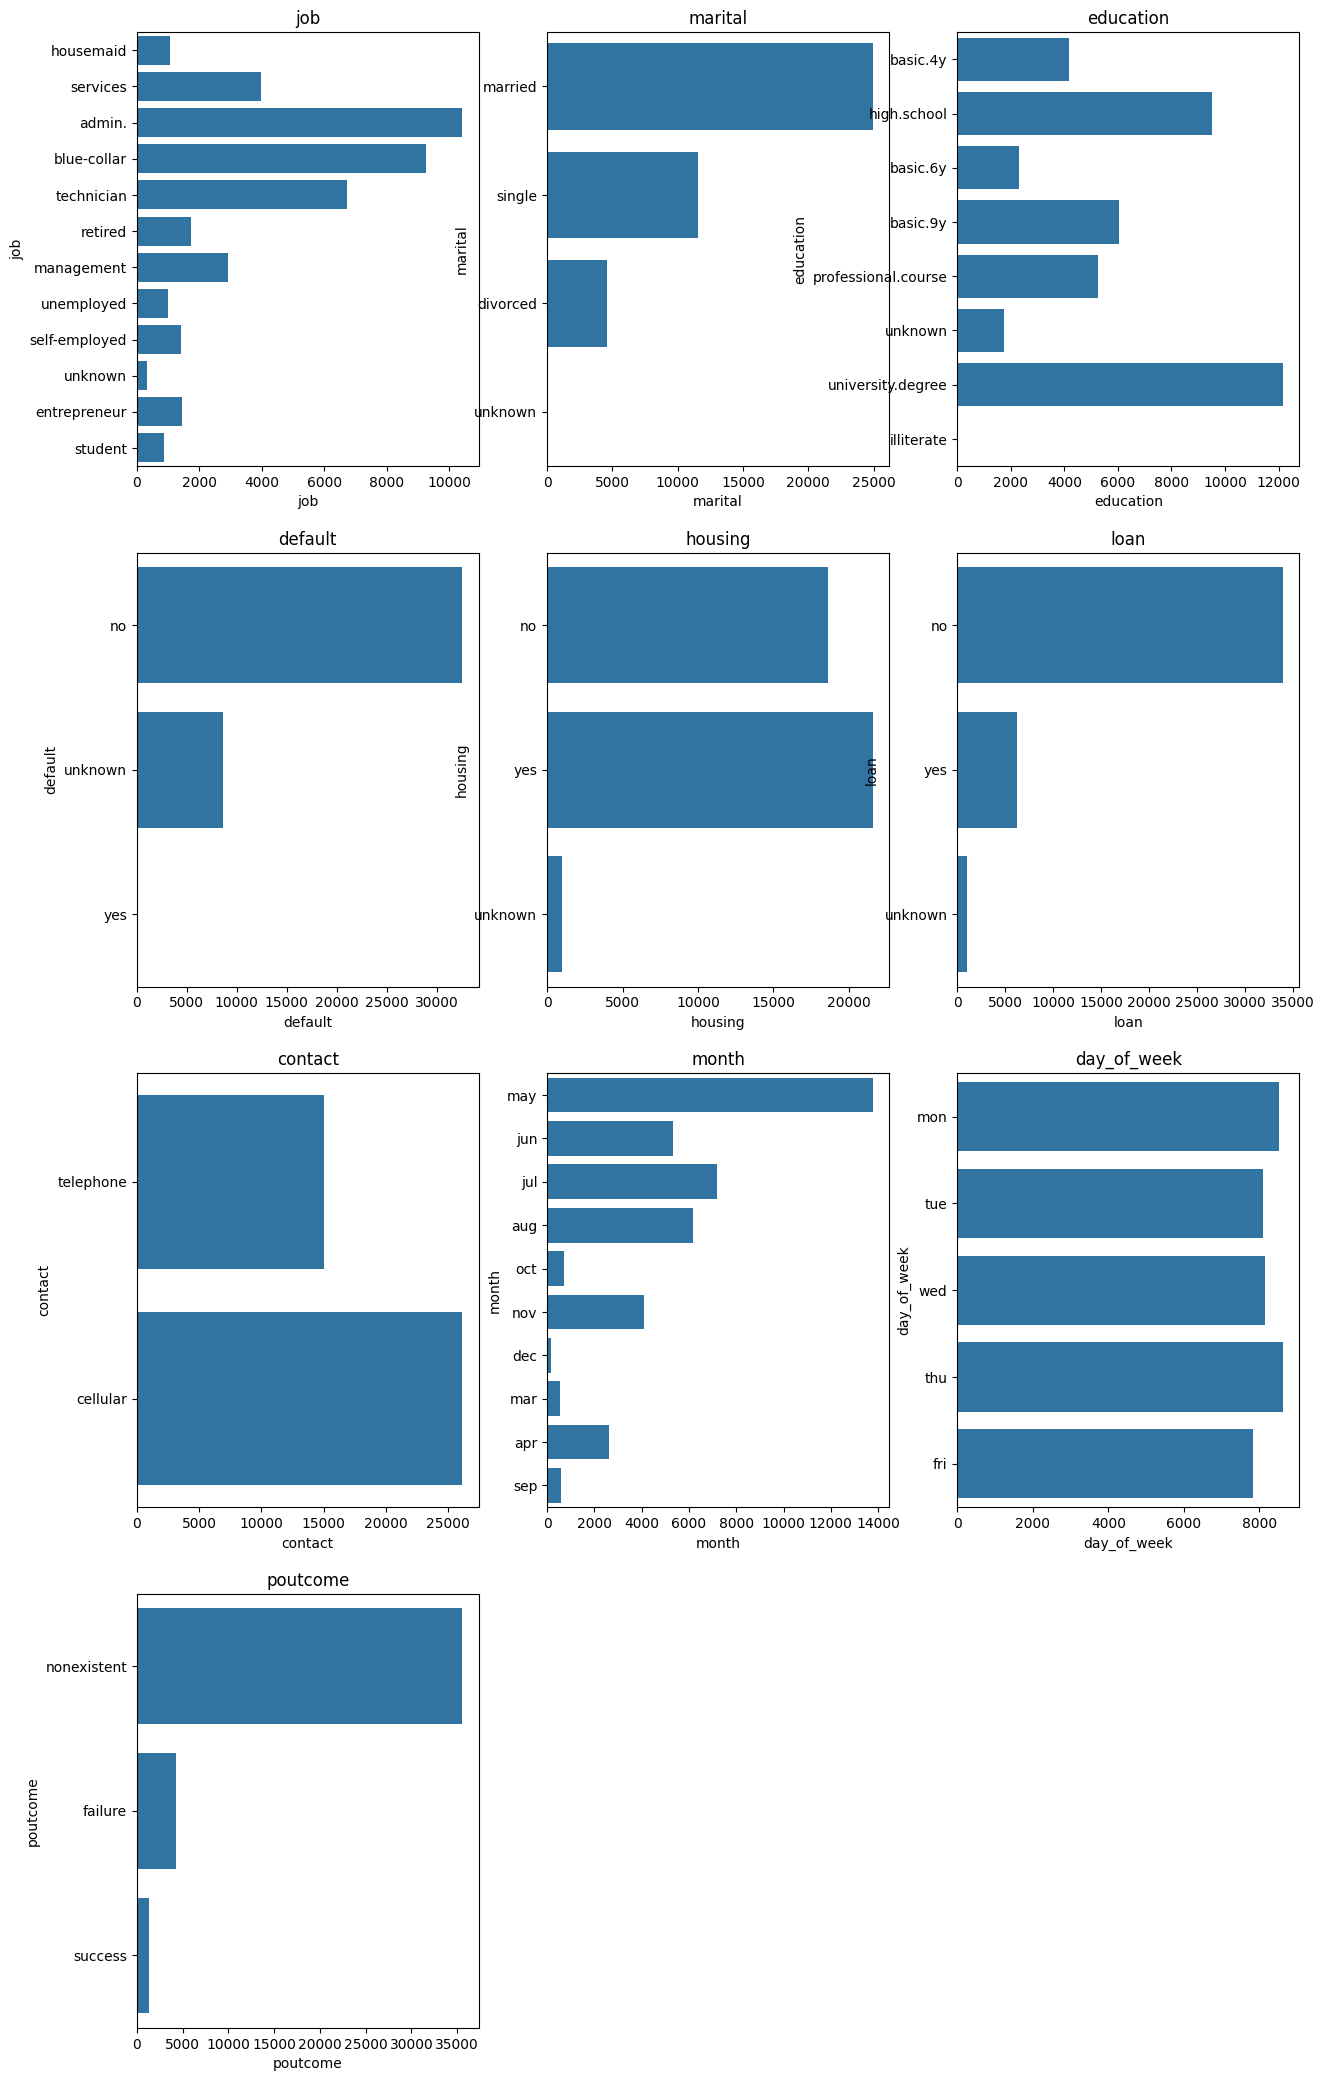

In [12]:
## Finding relations in categorical values
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


***Findings***

---


1. In Job feature "Admin" is highest and "Unknown" is the lowest category
2.  In Marital feature "Married" is highest and "Divorced" is the lowest category
3. In Education feature "University digree" is highest and "Unkown" is the lowest category
4.  In Default feature "No" is highest and "Yes" is the lowest category. # it can be drop #
5. In Housing feature "Yes" is highest and "NO" is the lowest category
6. In Loan feature "No" is highest and "Yes" is the lowest category
7. In Contact feature "Cellular" is highest and "Telephone" is the lowest category
8. In Month feature "May" is highest and "DEC" is the lowest category
9. In poutcome feature "non-existance" is highest and "sucess" is the lowest

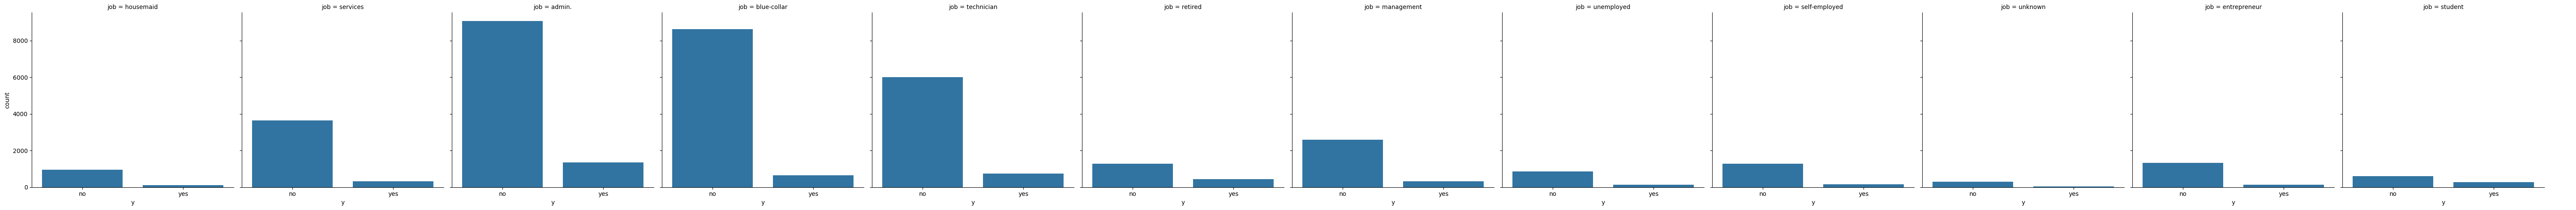

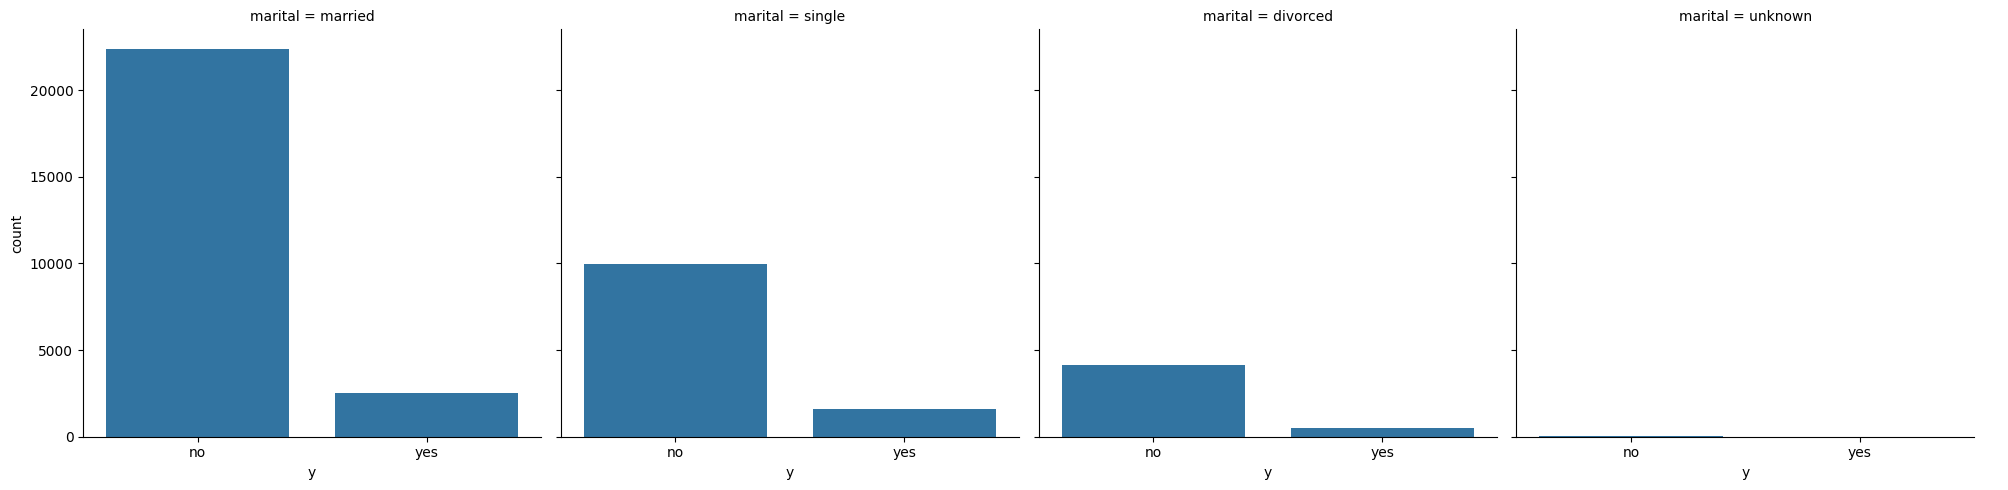

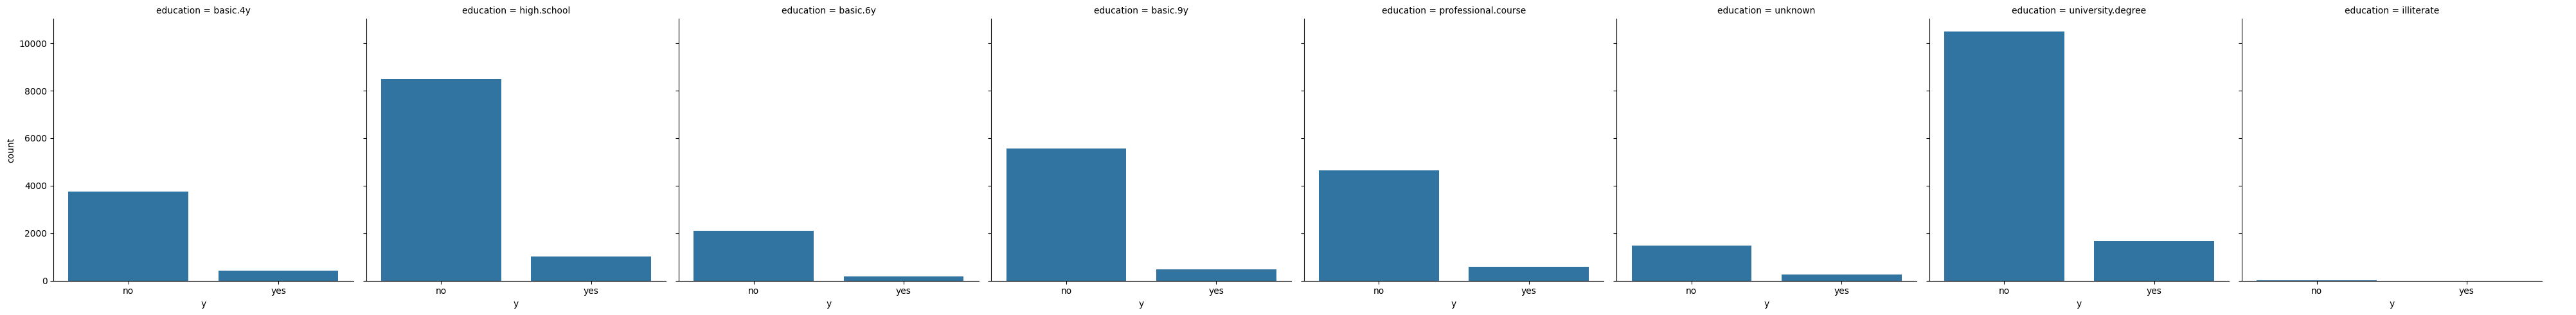

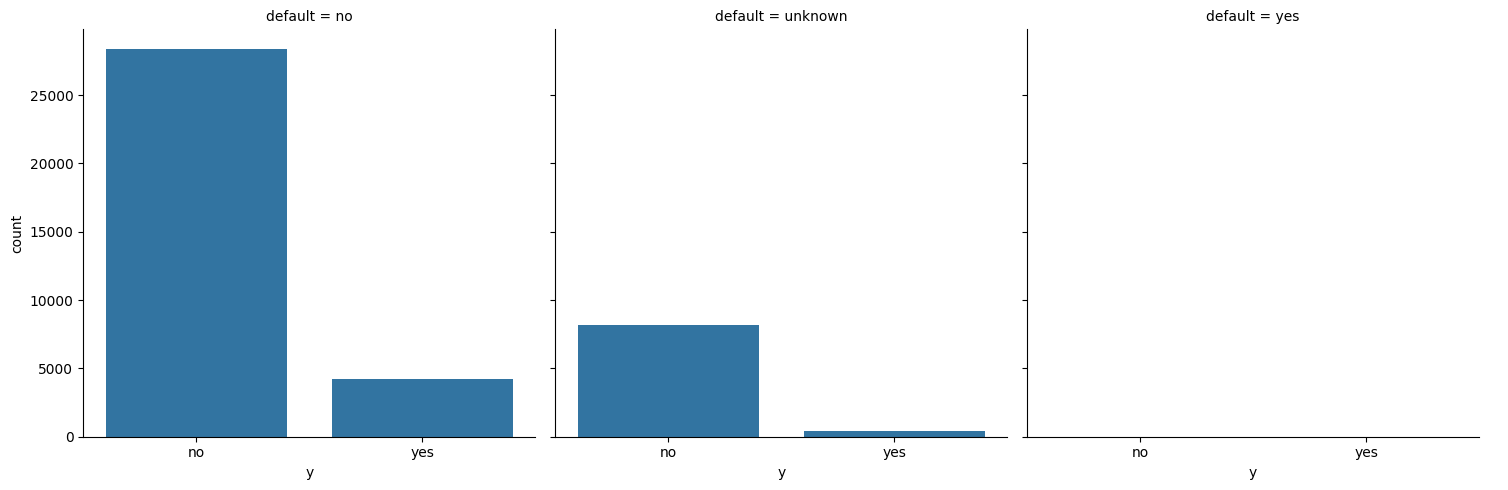

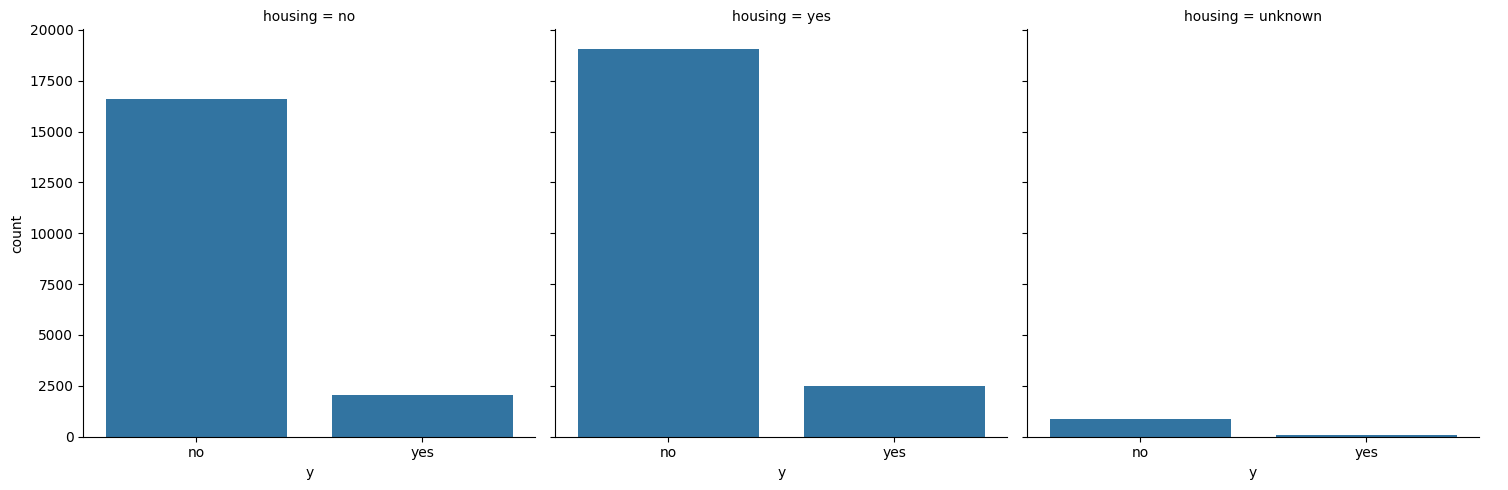

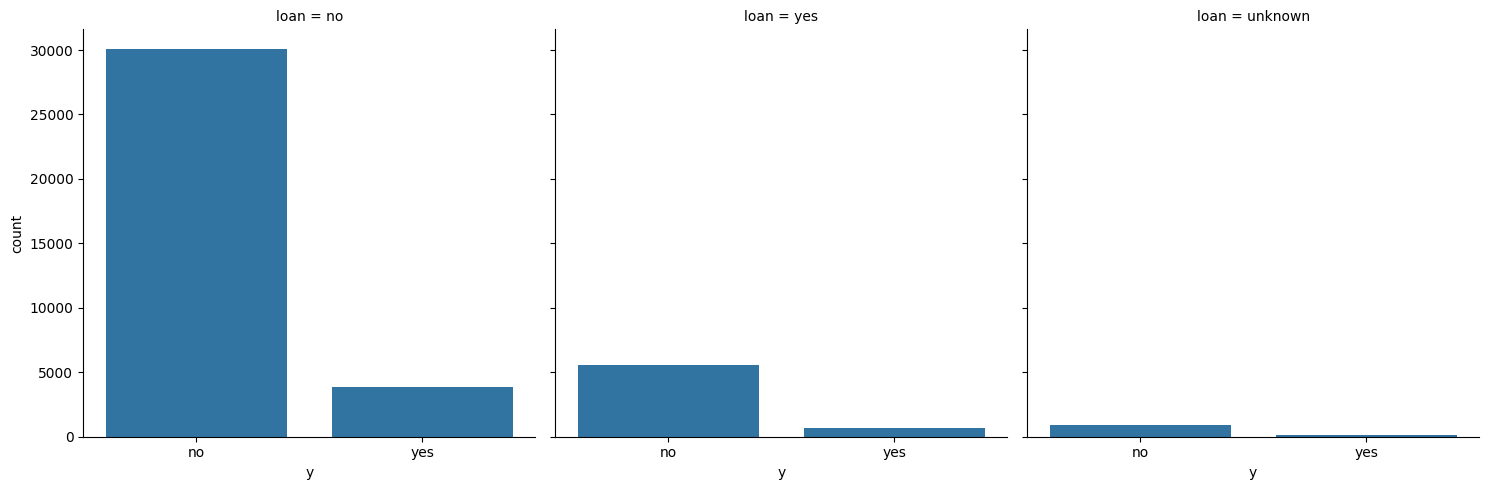

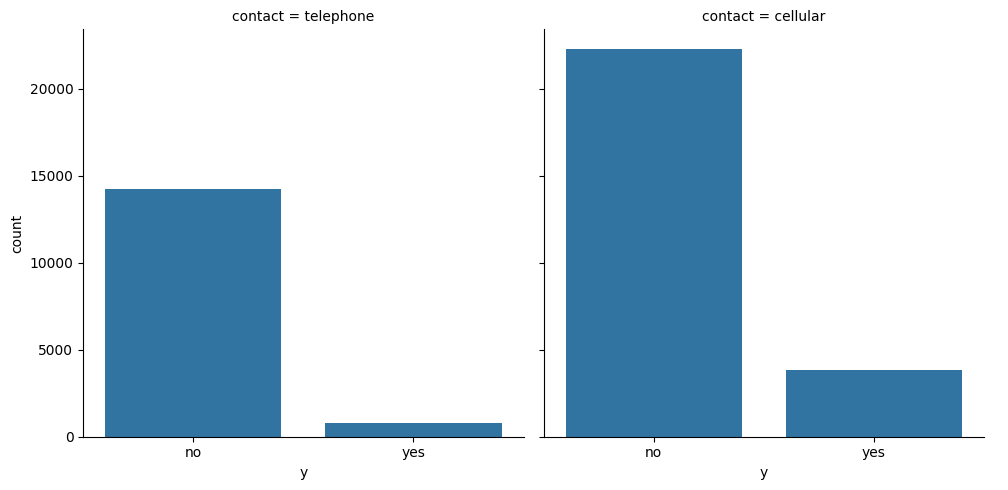

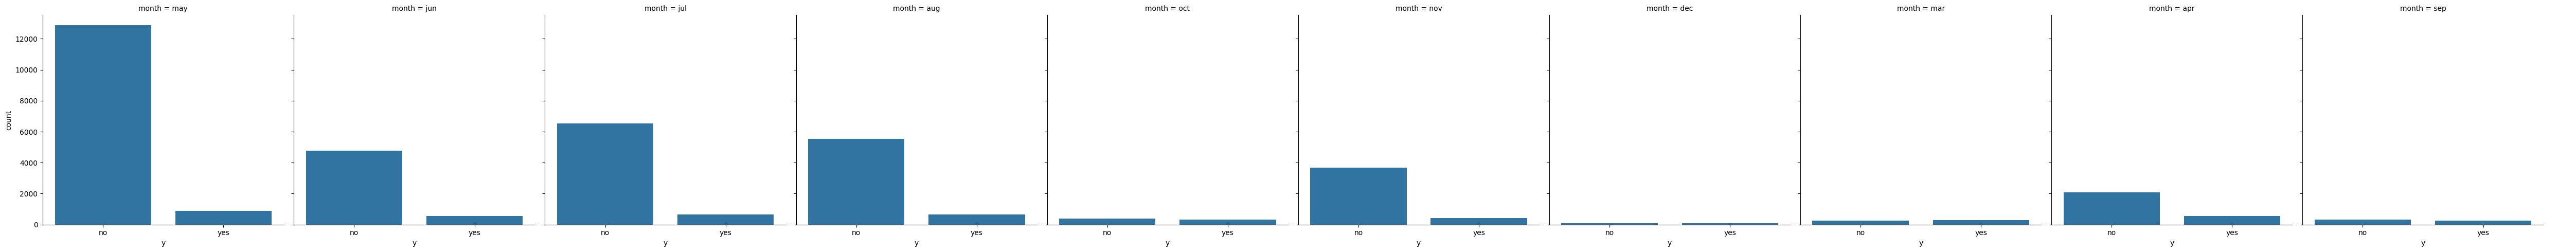

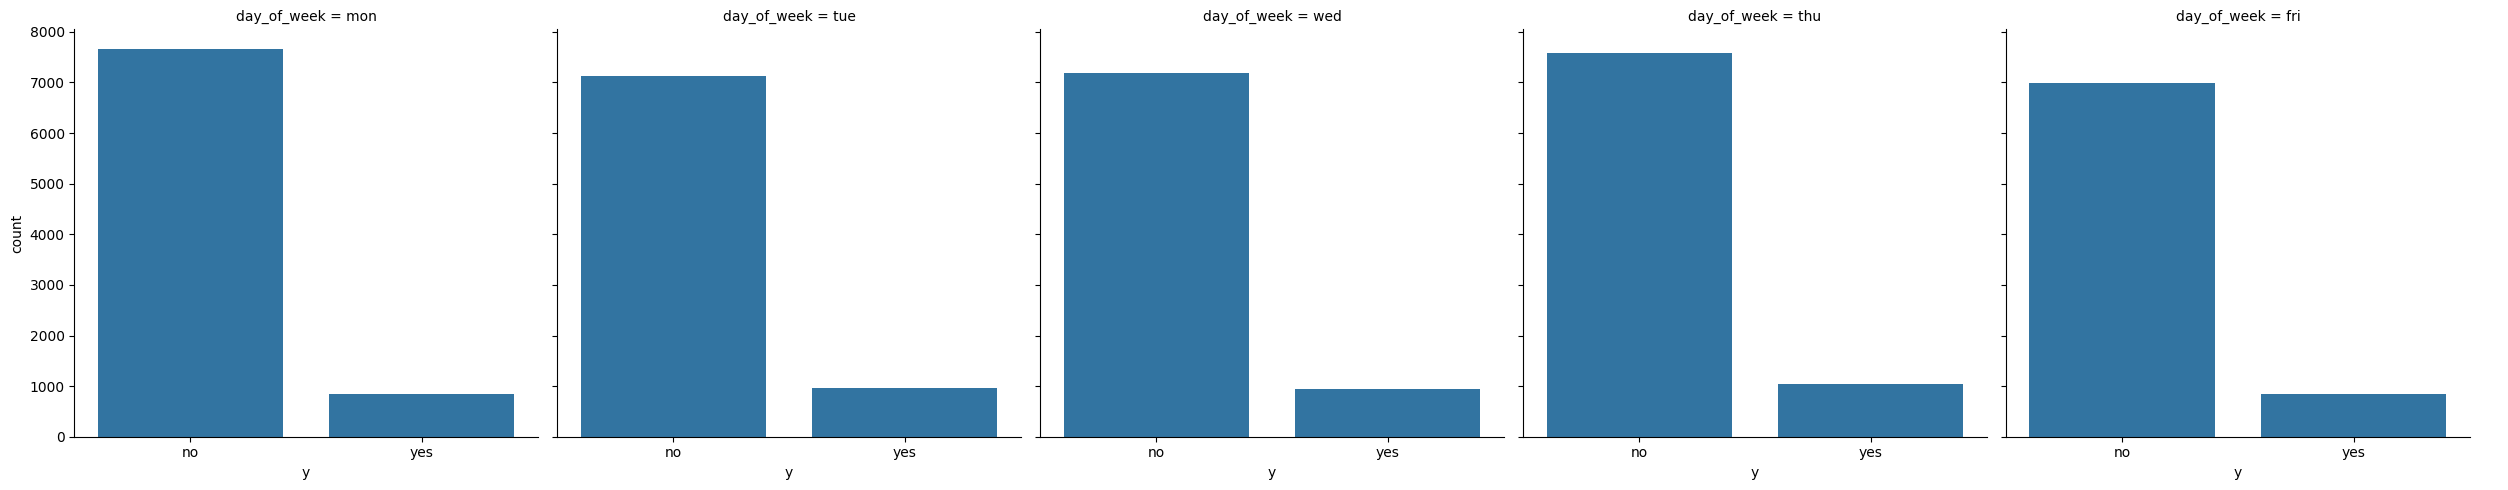

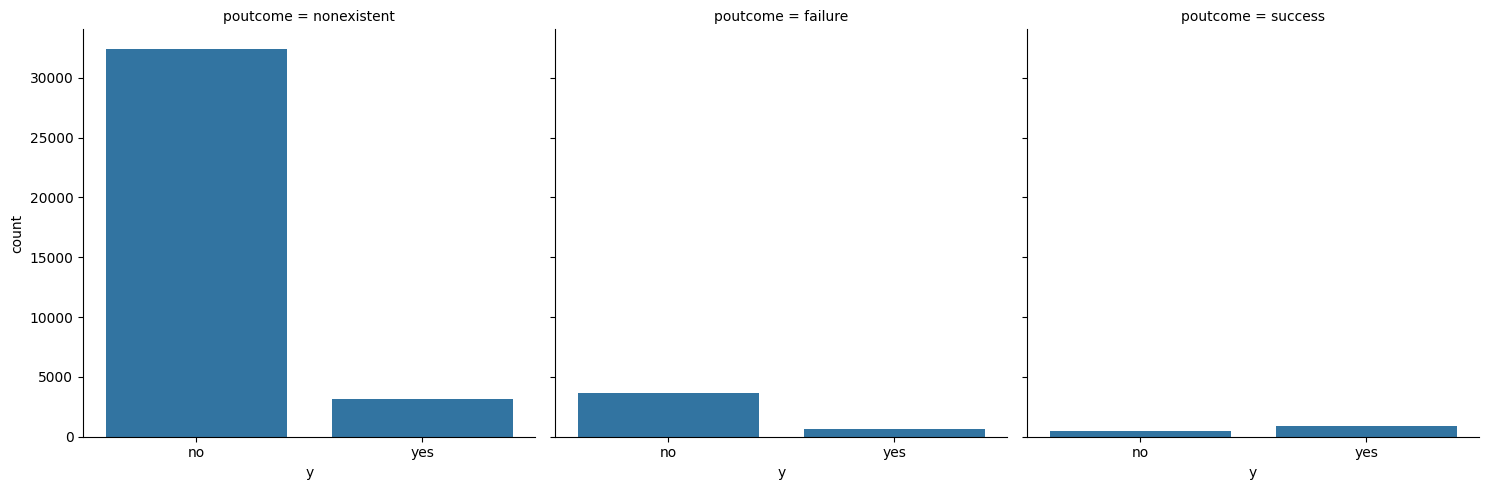

In [13]:
##Relationship between Categorical features and Labels
for categorical_feature in categorical_features:
  sns.catplot(x='y', col=categorical_feature, kind='count', data=df)
plt.show()

In [14]:
## Numeric representation of the relationship
for categorical_feature in categorical_features:
  print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

***Findings***

---


1. In the month of March the Customer shows the highest interest for insurance

2. If the customer has housing loan they are not interested in insurance.

3. If the Poutcome is sucess then the chances that customer shows interests is high.

In [15]:
## Understanding Numerical data
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O')]
print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
## Finding Discrete Numerical features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


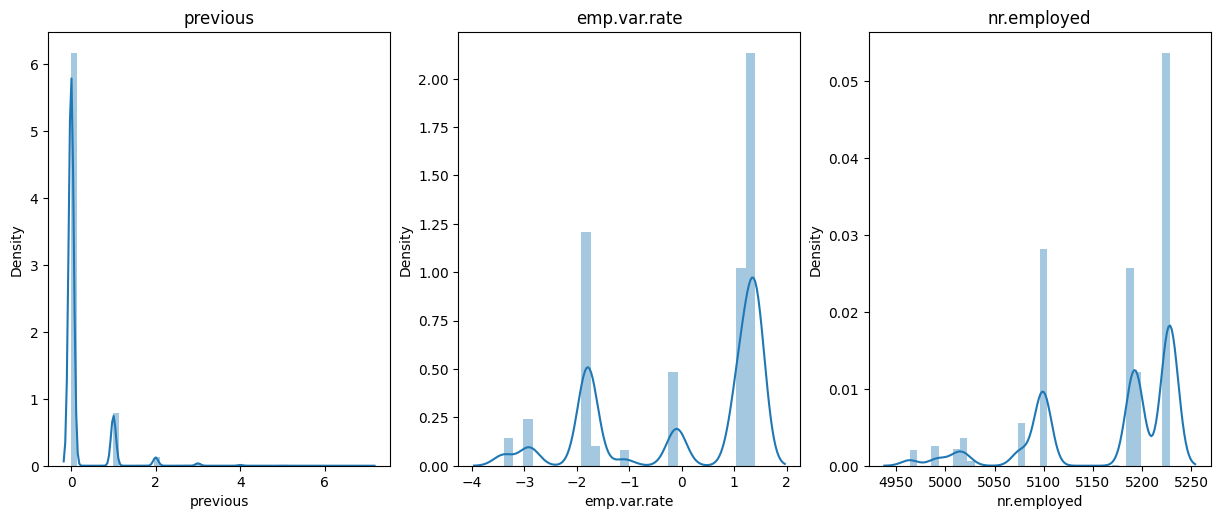

In [17]:
##Distribution of Discrete Numerical variable
plt.figure(figsize=(15,80))
plotnumber =1
for discrete_feature in discrete_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[discrete_feature])
    plt.xlabel(discrete_feature)
    plt.title(discrete_feature)
    plotnumber+=1
plt.show()

***Findings***

---
1. feature like nr. employed and emp.var.rate is normaly distributed.
2. Previous feature is skewed towards left.

In [18]:
## Finding Continuos Numerical features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Feature Count {}".format(len(continuous_features)))

Continuous Feature Count 9


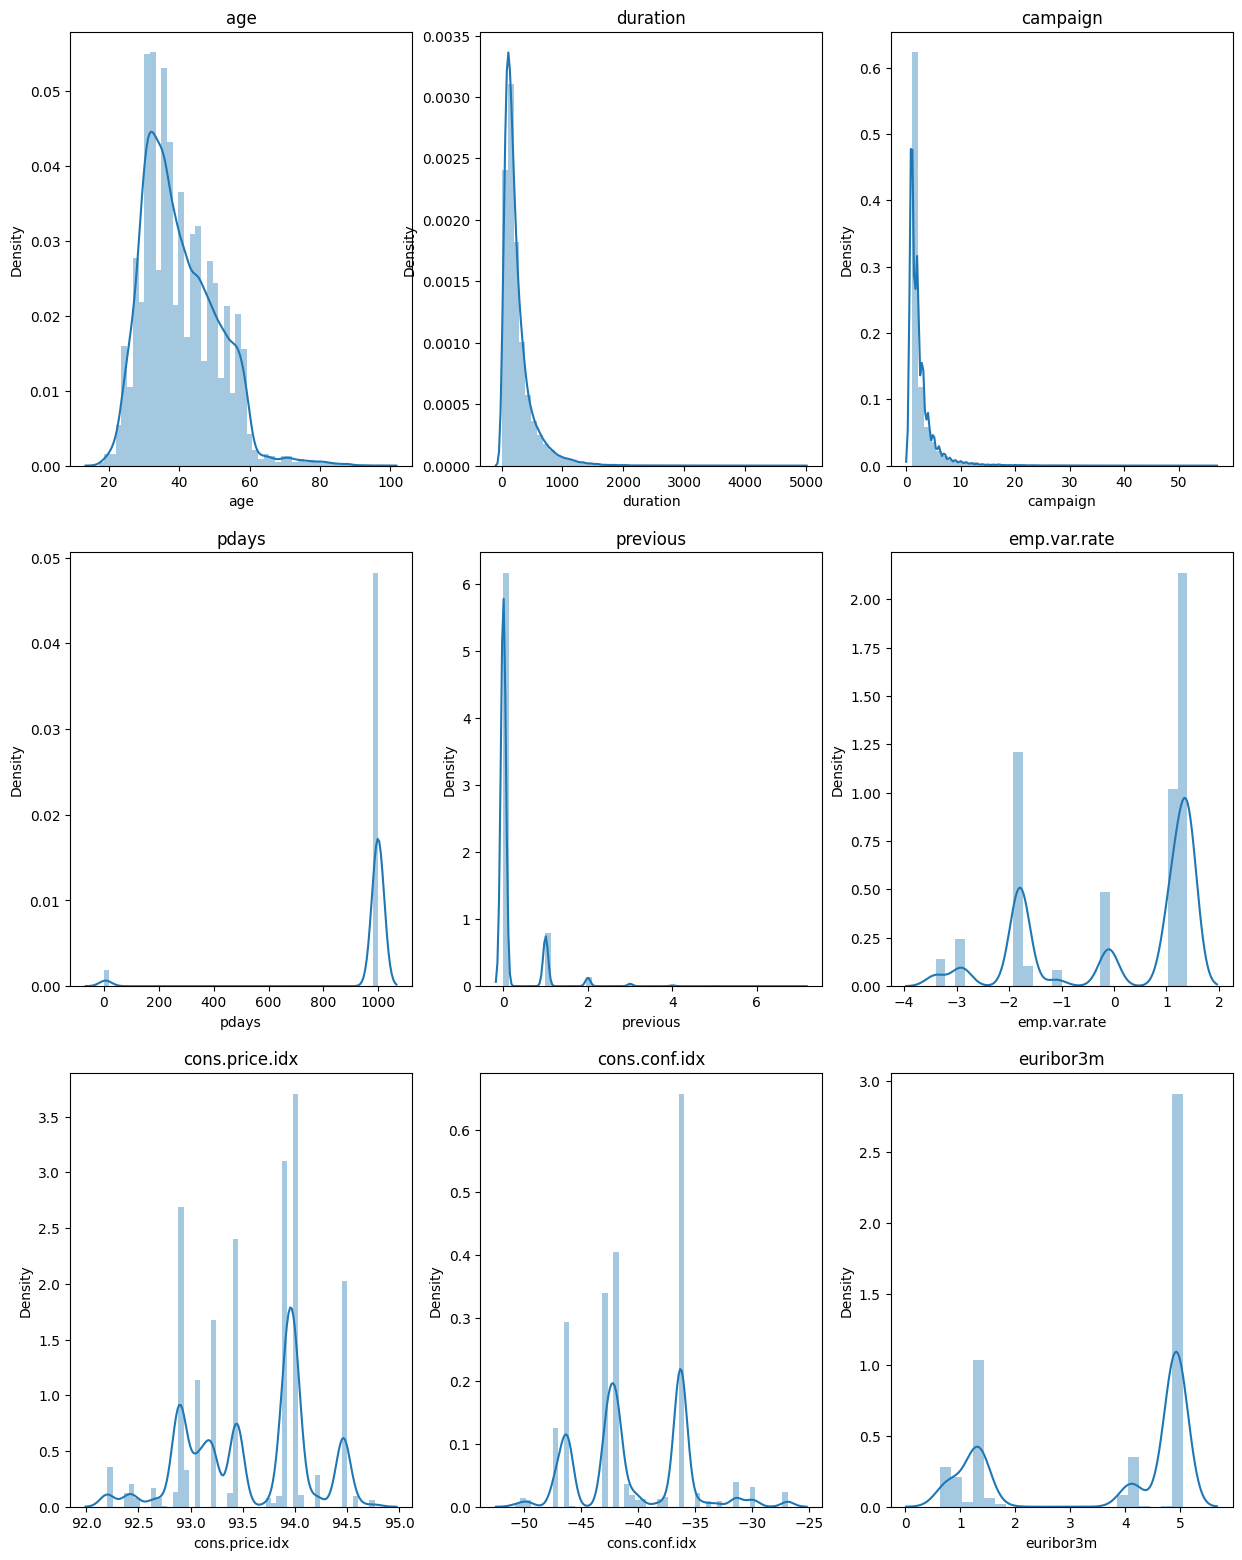

In [19]:
plt.figure(figsize=(15,80))
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plt.title(continuous_feature)
    plotnumber+=1
plt.show()

***Findings***

---
1. Features like age, price index, conf. index, are Normaly distributed
2. Rest of the features is heavely skewed and may have outliers

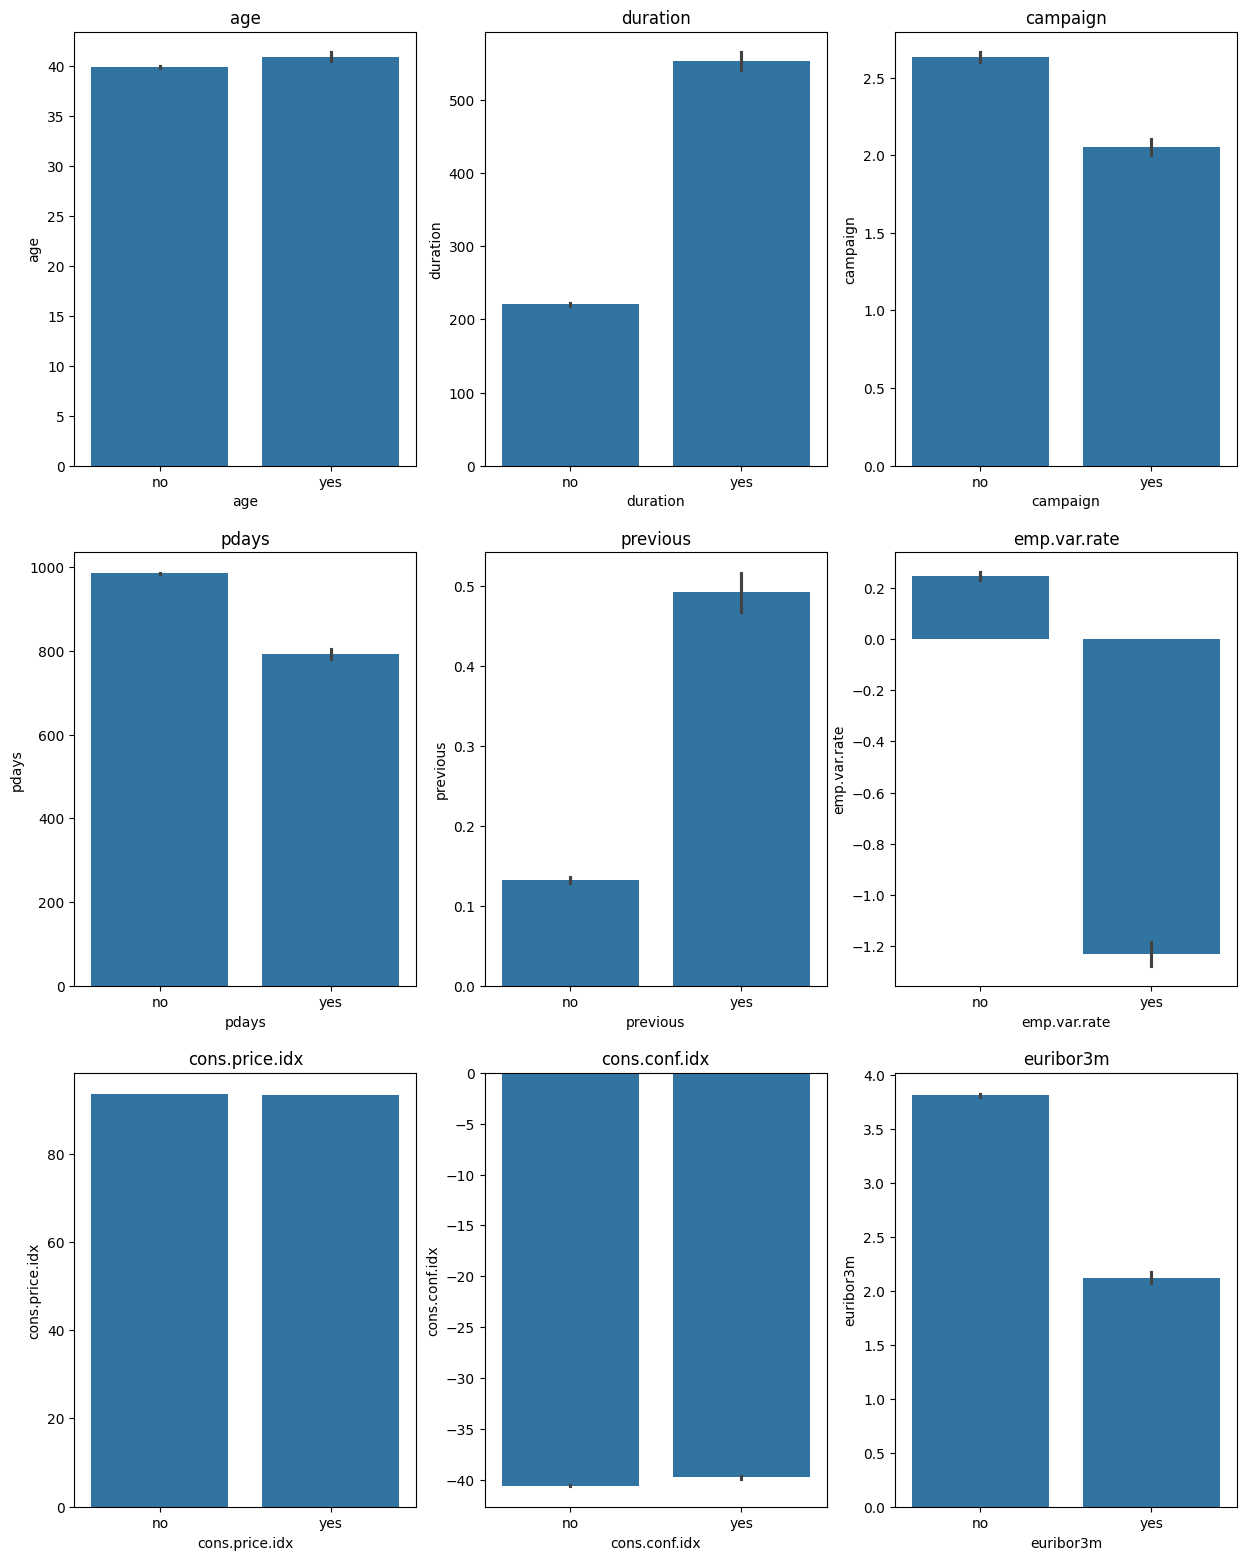

In [20]:
## Finding relation between continus and Lable data

plt.figure(figsize=(15,80))
plotnumber = 1
for feature in continuous_features:
  ax =plt.subplot(12,3,plotnumber)
  sns.barplot(x='y',y=df[feature],data=df)
  plt.xlabel(feature)
  plt.title(feature)
  plotnumber+=1
plt.show()

***Findings***

---

1. The consumer shows more interests when they had discusion for longer duration.  
2. The customer shows more interests if the Pdays are more.
3. If Interest (Euribor) is high then clients do not purchase the products.
4. If total number of contacts are more then the customers are generally interestsed to purchase the term insurance.
5. If percentage change in employement is more the chances of sales of term insurance is also more

# **5.Data Preprossing**

### ***Finding Outliers***

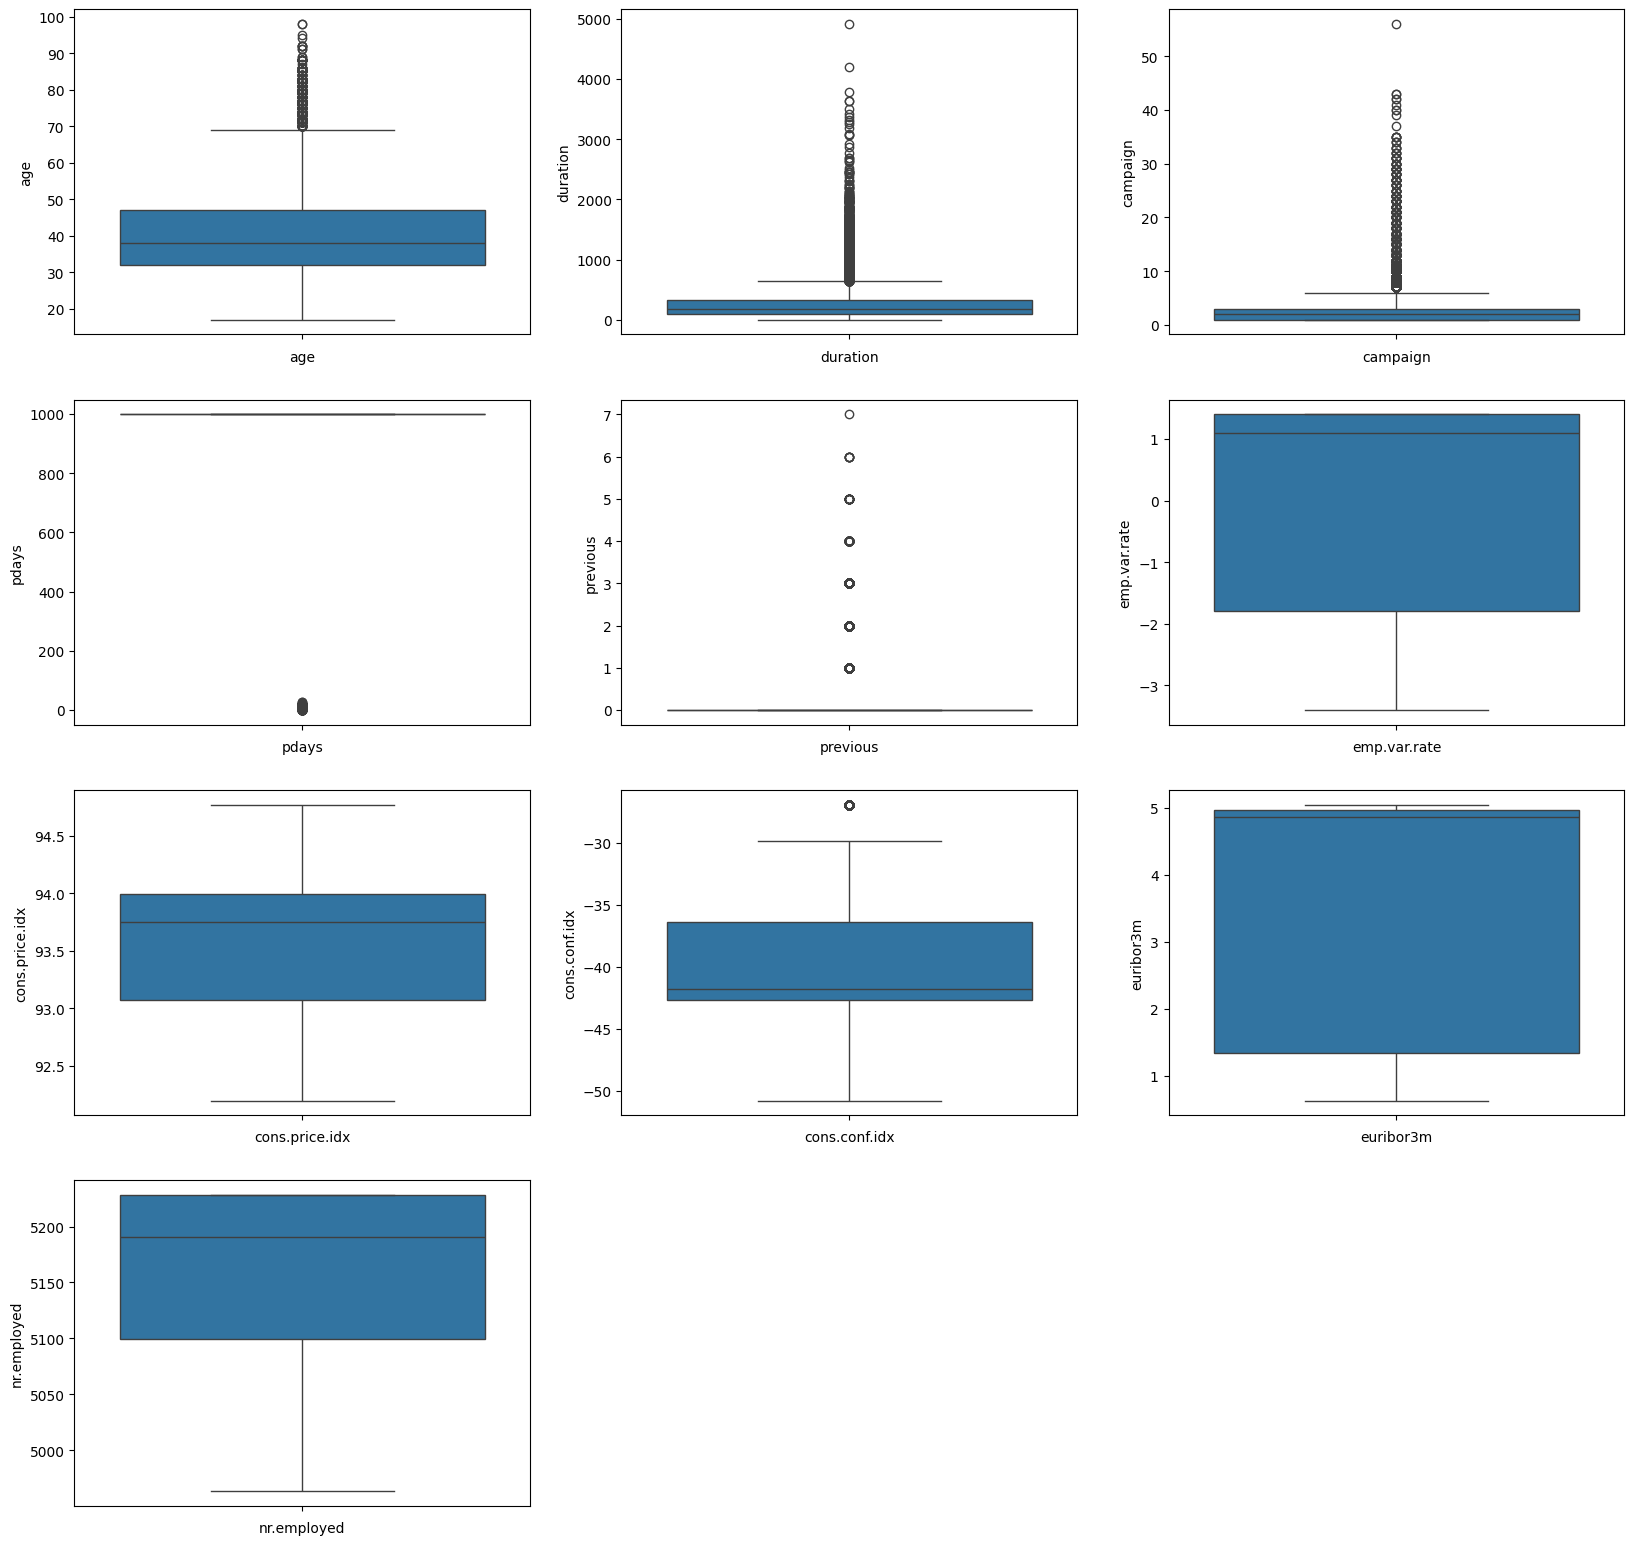

In [21]:
## Finding Outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

***Findings***

---


Age, duration, campaigns, p_days and previous have outliers

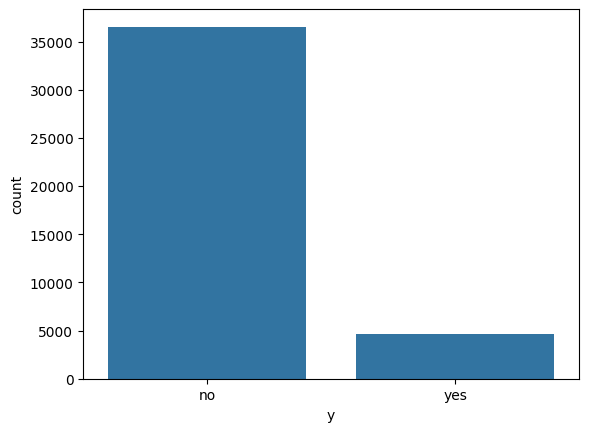

In [22]:
## Checking if the data is balances or not
sns.countplot(x='y',data=df)
plt.show()

In [23]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


***Findings***

---


Imbalanced data

***Next actions***

---


1. Drop Unwanted columns
2. Handle Categorical data
3. Remove outliers

In [24]:
dh1 = df.copy()

In [25]:
dh1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
dh1.shape

(41188, 21)

In [27]:
#Default
dh1.groupby(['y','default' ]).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

***Findings***

---


Anybody with default has not taken term insurance, we take it as a feature and not deleting it

In [28]:
## Pdays
dh1.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: int64

***Findings***

---


The data in Pdays is not providing any variability. Additionaly 90% of the data is 999 therefore we will drop the column from the data set

In [29]:
dh1.drop('pdays',axis=1,inplace=True)

<Axes: xlabel='y', ylabel='age'>

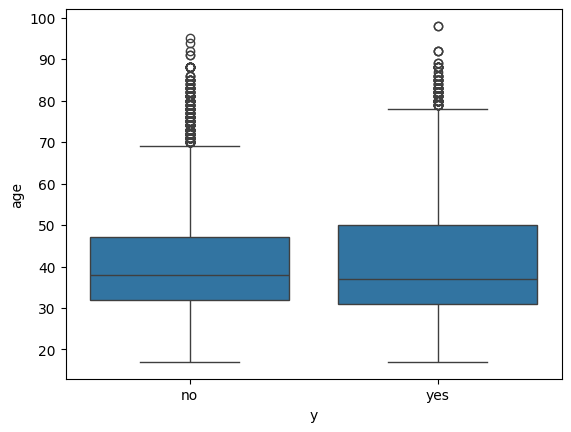

In [30]:
#Age
sns.boxplot(x='y',y='age',data=dh1)

***Findings***

---


Outliers present for only a specific group which is senior citizens from 70 to 100. Hence, outliers will be ignored.

<Axes: xlabel='y', ylabel='duration'>

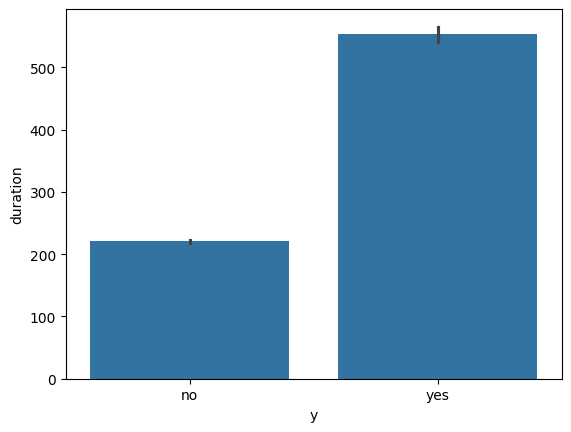

In [ ]:
##Duration
sns.barplot(x='y',y='duration',data=dh1)

***Findings***

---


High Duration impacting decisions of Consumers hence outliers cannot be removed

In [31]:
#Campaign
dh1.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            2300
     2            1211
     3             574
     4             249
     5             120
     6              75
     7              38
     8              17
     9              17
     10             12
     11             12
     12              3
     13              4
     14              1
     15              2
     17              4
     23              1
Name: campaign, dtype: int64

In [32]:
Q1=dh1['campaign'].quantile(0.25)
Q3=dh1['campaign'].quantile(0.75)
IQR=Q3-Q1
IQR

2.0

In [33]:
upperlimit = Q3 + 1.5 * IQR
lowerlimit = Q1 - 1.5 * IQR
print('upper_limit',upperlimit)
print('lower_limit',lowerlimit)

upper_limit 6.0
lower_limit -2.0


In [34]:
dh1.loc[dh1['campaign'] > upperlimit, 'campaign'] = np.median(dh1['campaign'])

In [35]:
## Previous
dh1.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32422
     1            3594
     2             404
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3141
     1             967
     2             350
     3             128
     4              38
     5              13
     6               3
Name: previous, dtype: int64

***Findings***

---


We can also delete the Column because more than 70% of the data is in varriable 0 but since it contains useful information we are not deleting it

### ***Transforming the data***

In [36]:
## We will do encoding for the categorical data
for col in dh1.select_dtypes(include ='object').columns:
  print(col)
  print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [37]:
dh7=dh1.copy()

In [38]:
dh7.shape

(41188, 20)

In [39]:
## Importing required lib.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

***Encoding Plan***

---


1. One hot encoding for 'job','marital', 'contact', 'poutcome','day_of_week
2. Binary Encoding for 'loan','housing','default'
3. Ordinal encoding for 'education'
4. lable encoding for 'y'
5. sin/cosine encoding for 'month'

In [40]:
one_hot = ['job','marital', 'contact', 'poutcome','day_of_week']

In [41]:
for a in one_hot:
  if a == 'contact':
      d = pd.get_dummies(dh7[a], prefix='ct')
      dh7 = pd.concat([dh7,d], axis=1)
      del dh7[a]
  elif a == 'poutcome':
      d = pd.get_dummies(dh7[a], prefix='pc')
      dh7 = pd.concat([dh7,d], axis=1)
      del dh7[a]
  else:
      d = pd.get_dummies(dh7[a], drop_first=True)
      dh7 = pd.concat([dh7,d], axis=1)
      del dh7[a]

dh7.head()

,age,education,default,housing,loan,month,duration,campaign,previous,emp.var.rate,...,unknown,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success,mon,thu,tue,wed
0,56,basic.4y,no,no,no,may,261,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
1,57,high.school,unknown,no,no,may,149,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
2,37,high.school,no,yes,no,may,226,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
3,40,basic.6y,no,no,no,may,151,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
4,56,high.school,no,no,yes,may,307,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False


In [42]:
dh7.shape

(41188, 38)

In [43]:
#Binarry encoding : 'Loan', 'Housing','default'
bin_encoder = preprocessing.LabelBinarizer()
bin_list = ['loan', 'housing','default']
for l in bin_list:
    a = bin_encoder.fit_transform(dh7[l])
    dh7[l] = a

dh7.head()

,age,education,default,housing,loan,month,duration,campaign,previous,emp.var.rate,...,unknown,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success,mon,thu,tue,wed
0,56,basic.4y,1,1,1,may,261,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
1,57,high.school,0,1,1,may,149,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
2,37,high.school,1,0,1,may,226,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
3,40,basic.6y,1,1,1,may,151,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
4,56,high.school,1,1,0,may,307,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False


In [44]:
#Ordinal Encoding: 'education'
ord_encoder = OrdinalEncoder()
a = ord_encoder.fit_transform(asarray(dh7['education']).reshape(-1,1))
a = a.reshape(41188,)
dh7['education'] = a
dh7.head()

,age,education,default,housing,loan,month,duration,campaign,previous,emp.var.rate,...,unknown,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success,mon,thu,tue,wed
0,56,0.0,1,1,1,may,261,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
1,57,3.0,0,1,1,may,149,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
2,37,3.0,1,0,1,may,226,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
3,40,1.0,1,1,1,may,151,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
4,56,3.0,1,1,0,may,307,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False


In [45]:
#Sin/Cosine Encoding: 'month'
import math
dh7['month'] = dh7['month'].map({'may':1,
               'jun':2,
               'jul':3,
               'aug':4,
               'oct':5,
               'nov':6,
               'dec':7,
               'mar':8,
               'apr':9,
               'sep':10})
dh7['month'] = dh7['month'].apply(lambda x: math.sin(2*math.pi*x/10))

In [46]:
dh7.head()

,age,education,default,housing,loan,month,duration,campaign,previous,emp.var.rate,...,unknown,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success,mon,thu,tue,wed
0,56,0.0,1,1,1,0.587785,261,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
1,57,3.0,0,1,1,0.587785,149,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
2,37,3.0,1,0,1,0.587785,226,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
3,40,1.0,1,1,1,0.587785,151,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
4,56,3.0,1,1,0,0.587785,307,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False


In [47]:
dh7.shape

(41188, 38)

In [48]:
dh7.isnull().sum()

,0
age,0
education,0
default,0
housing,0
loan,0
month,0
duration,0
campaign,0
previous,0
emp.var.rate,0


In [49]:
bin_encoder = preprocessing.LabelBinarizer()
bin_list = ['y']
for l in bin_list:
    a = bin_encoder.fit_transform(dh7[l])
    dh7[l] = a

dh7.head()

,age,education,default,housing,loan,month,duration,campaign,previous,emp.var.rate,...,unknown,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success,mon,thu,tue,wed
0,56,0.0,1,1,1,0.587785,261,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
1,57,3.0,0,1,1,0.587785,149,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
2,37,3.0,1,0,1,0.587785,226,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
3,40,1.0,1,1,1,0.587785,151,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False
4,56,3.0,1,1,0,0.587785,307,1,0,1.1,...,False,False,True,False,True,False,True,False,False,False


In [50]:
categorical_cols = dh7.select_dtypes(include=['object']).columns

categorical_cols

Index([], dtype='object')

In [51]:
dh7.isnull().sum()

,0
age,0
education,0
default,0
housing,0
loan,0
month,0
duration,0
campaign,0
previous,0
emp.var.rate,0


In [52]:
dh7.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
41183,False
41184,False
41185,False
41186,False


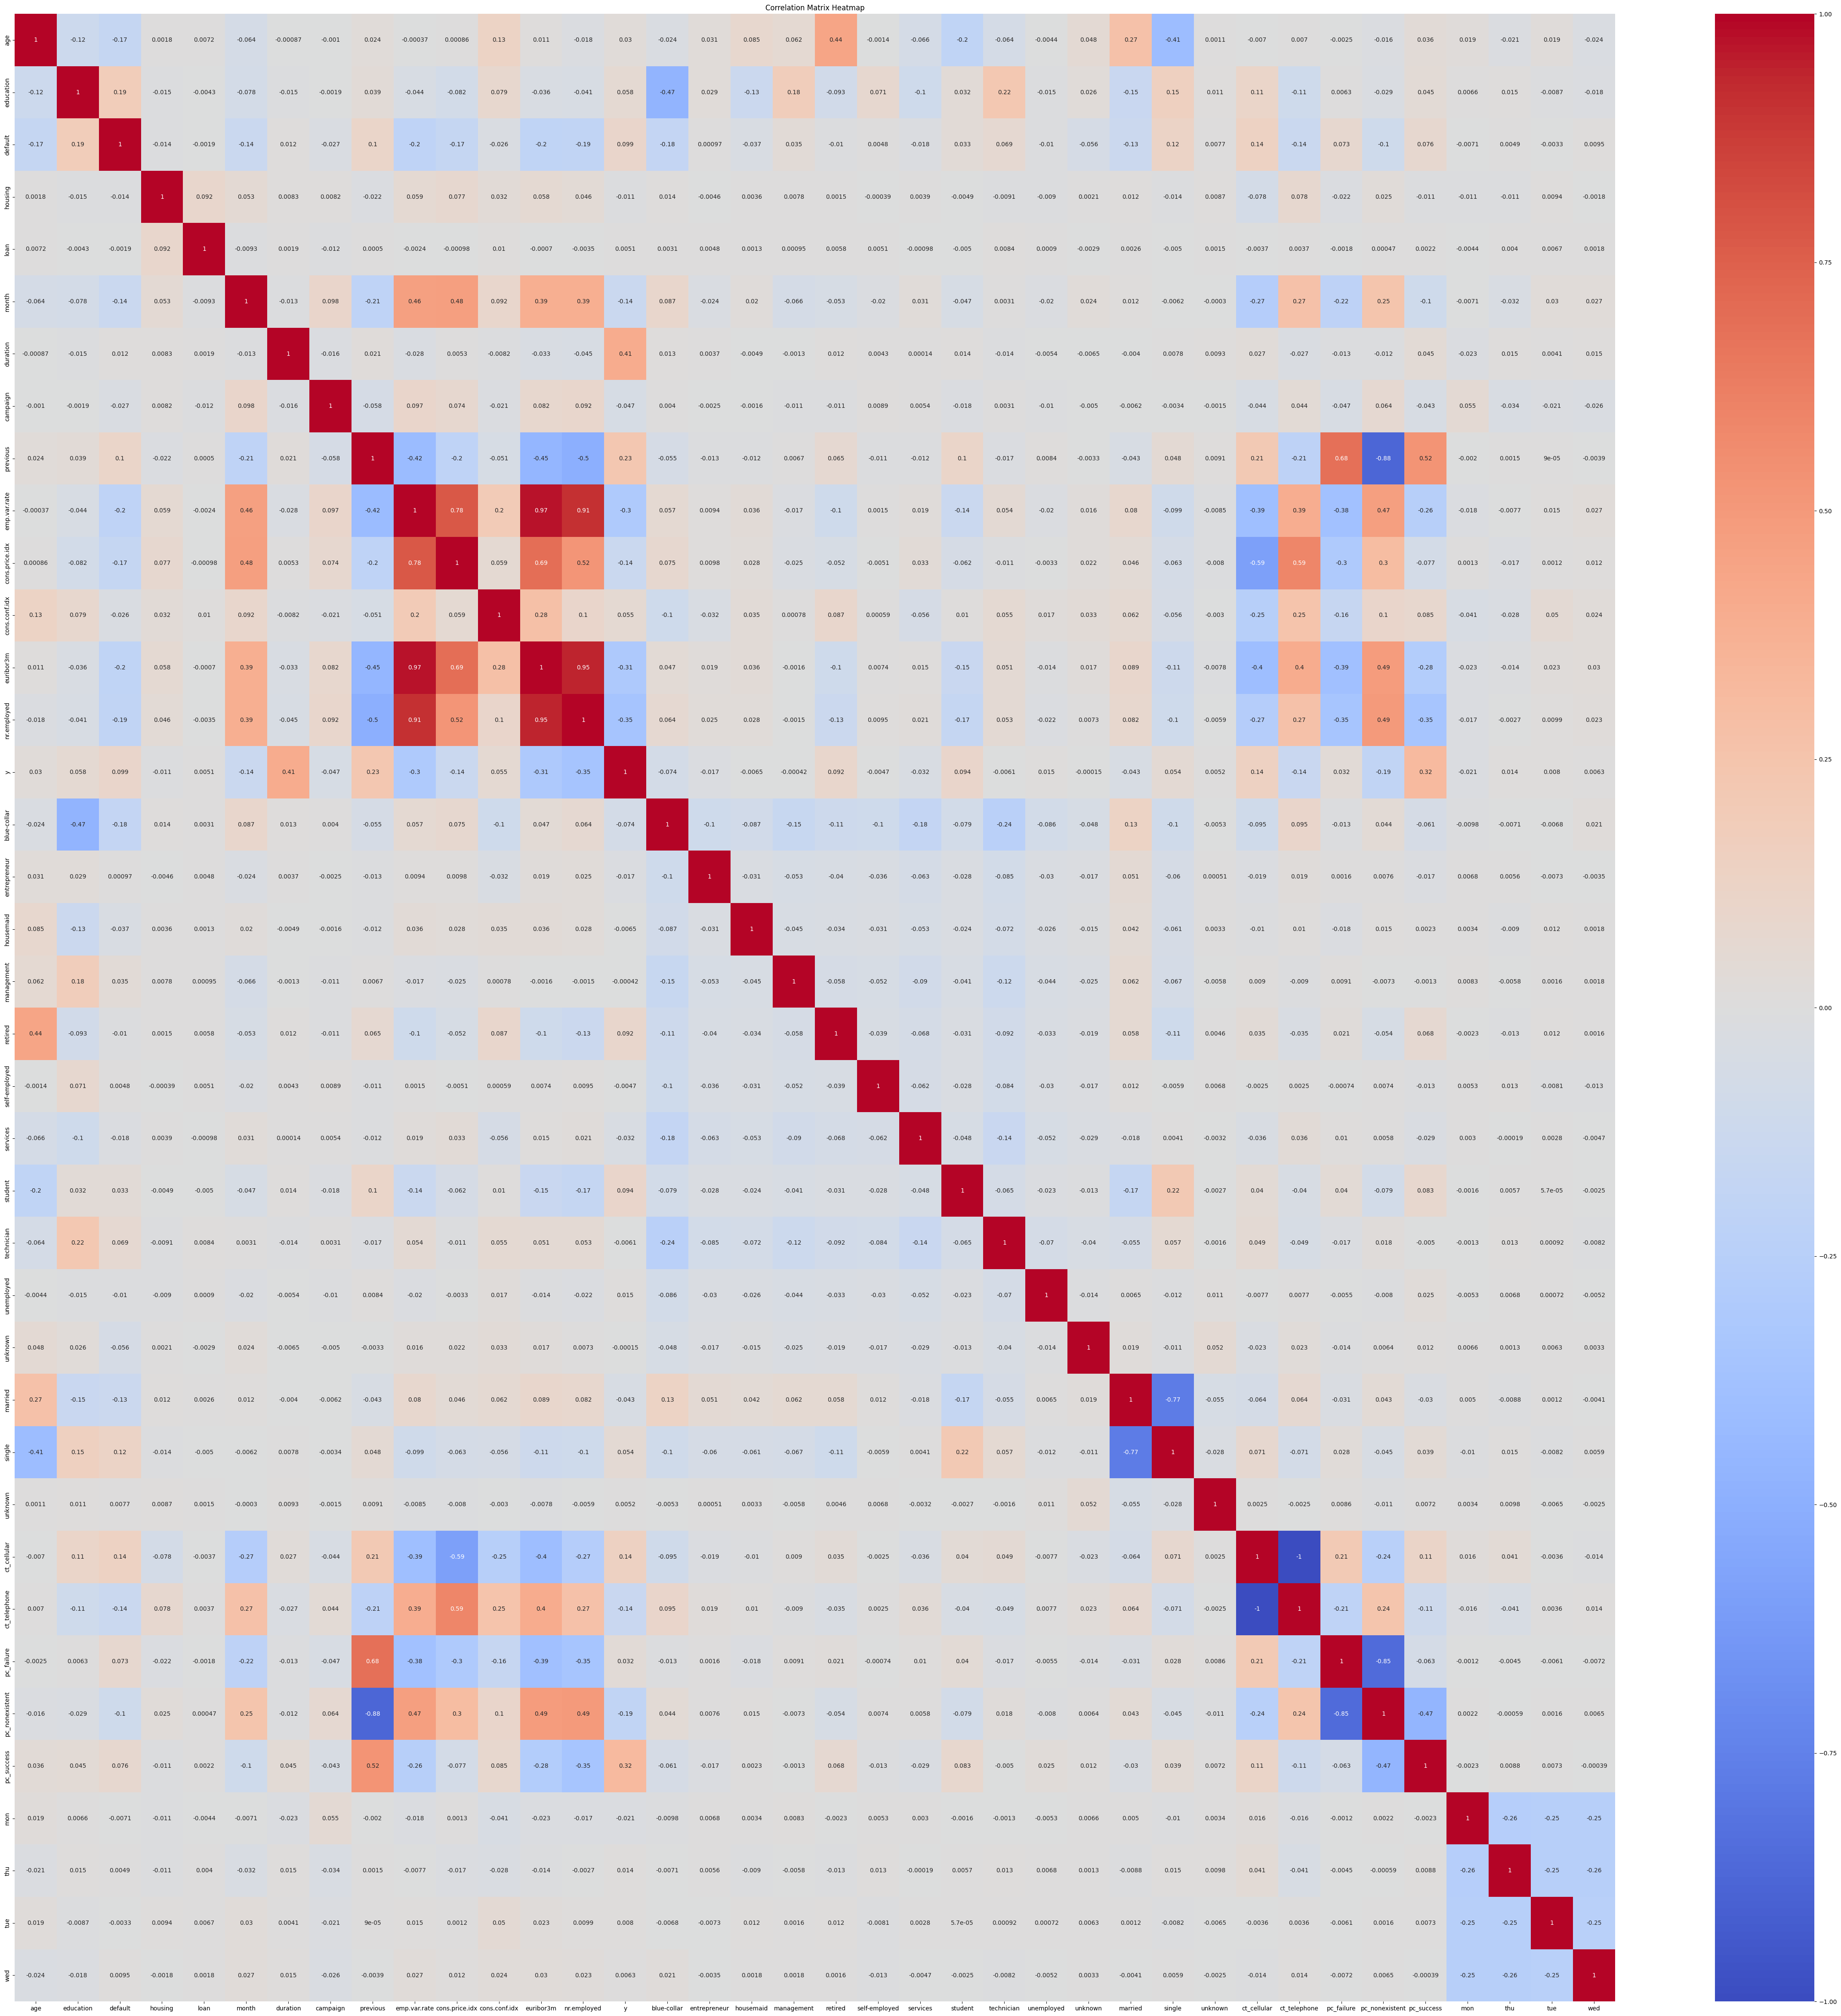

In [56]:
correlation_matrix = dh7.corr()

# Correlation heatmap
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **6.Model Creation**

In [57]:
dh8 = dh7.copy()

In [58]:
## Spliting the data into train and test
X = dh8.drop(['y'], axis=1)
y = dh8['y']

In [60]:
# Importing required Lib.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(32950, 37)

In [64]:
y_train.shape

(32950,)

In [65]:
#balance y data
pd.Series(y_train).value_counts()

,count
y,
0,29245
1,3705


In [66]:
## Balacing the data
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print("Before SMOTE\n",pd.Series(y_train).value_counts())
X_train,y_train=sm.fit_resample(X_train,y_train)#applying sampling on target variable
print("After SMOTE\n",pd.Series(y_train).value_counts())

Before SMOTE
 y
0    29245
1     3705
Name: count, dtype: int64
After SMOTE
 y
0    29245
1    29245
Name: count, dtype: int64


## ***Building Models***

In [67]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [68]:
# Train and evaluate the models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [69]:
# Display the results
results_dh8 = pd.DataFrame(results).T
print(results_dh8)

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.860160   0.441065  0.868449  0.585014
Decision Tree           0.877033   0.465909  0.570053  0.512747
Random Forest           0.906531   0.582915  0.620321  0.601036
Support Vector Machine  0.869871   0.459824  0.838503  0.593939


**Using XG Boost**

In [70]:


!pip install scikit-learn  # Ensure scikit-learn is installed
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xgb_model = XGBClassifier()
xgb_search = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=params_grid,
            cv=2, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)
xgb_search.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=5)

In [71]:
xgb_search.best_params_

{'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.25}

In [72]:
# Scores

xgb_pred = xgb_search.best_estimator_.predict(X_test)

xgb_acc = accuracy_score(y_test , xgb_pred)
xgb_prec = precision_score(y_test , xgb_pred)
xgb_rec = recall_score(y_test , xgb_pred)
xgb_fscore = f1_score(y_test , xgb_pred)

print('Accuracy: ', xgb_acc)
print("Precision: ", xgb_prec)
print("Recall:" , xgb_rec)
print('F1 score: ', xgb_fscore)

pd.crosstab(y_test, xgb_pred)

Accuracy:  0.906409322651129
Precision:  0.5835030549898167
Recall: 0.6128342245989304
F1 score:  0.5978090766823161


col_0,0,1
y,,
0,6894,409
1,362,573


***Findings***

---

XGboost is the best model with the best Accuracy, Recall and F1 score.

## ***ROC curve of the best model***

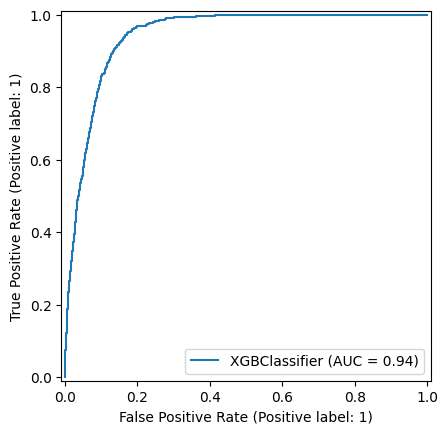

roc_auc_score is:  0.7784149214190051


In [73]:
## ROC Curve
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
xgb = xgb_search.best_estimator_
display = RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()
print('roc_auc_score is: ', metrics.roc_auc_score(y_test, xgb_pred))

## Important Features of the best model

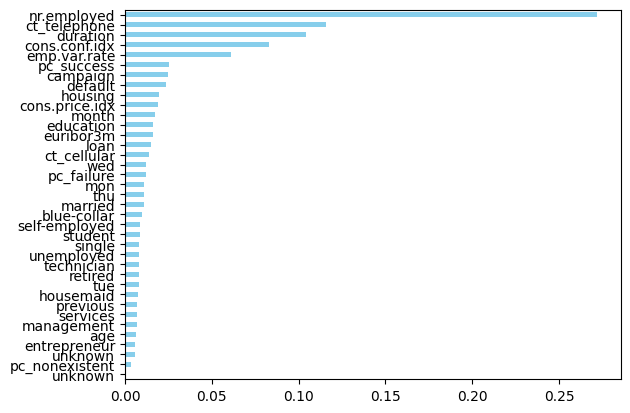

In [75]:
# Visualization for the most important features.
pd.DataFrame(xgb_search.best_estimator_.feature_importances_, index = X.columns,
columns=['importance']).sort_values('importance', ascending=True).plot(kind='barh',legend=None,color="skyblue");

In [76]:
pd.DataFrame(xgb_search.best_estimator_.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance', ascending=False)

,importance
nr.employed,0.272054
ct_telephone,0.115999
duration,0.104122
cons.conf.idx,0.082761
emp.var.rate,0.060900
pc_success,0.025358
campaign,0.024580
default,0.023897
housing,0.019734
cons.price.idx,0.018778


# **7. Conclusion**

***XGBoost is the best***

---
It is the best model among all other models to preditct the likeliness of the consumer to purchase a term insurance plan offered by Portugese Bank. The model scored 90.64% in accuracy and roc_auc_score is 0.77.


*   The top 5 important features which bank can use to increase more clients are listed below.
1. nr.employed
2. ct_telephone
3. duration
4. cons.conf.idx
5. emp.var.rate




# **8.Suggestions to the Bank regarding product**

To help the bank's marketing team effectively increase customer subscriptions to term deposits, bank can leverage key factors like number of employees, duration of last contact, contact type, consumer confidence index, and employment variation rate. Here are some suggestions based on these factors:

1. **Leverage Duration of Last Contact (Highly Impactful Factor):**
***Personalized, longer engagements:*** Since duration of the last contact is a
strong indicator (if duration = 0, the answer is likely no), focus on ensuring meaningful and engaging conversations. Train the sales team to avoid rushed or scripted conversations. Give them tools to tailor discussions based on the customer's profile and needs.
***Reduce unsuccessful calls:*** If the contact duration is too short, it's likely because the call was unsuccessful (e.g., customer didn't pick up or wasn't interested). Use predictive dialing strategies to reach customers at optimal times and ensure the customer service agents are well-prepared to overcome objections.
2. **Optimize Communication Type - Focus on Personalization via Telephone:**
***Improve telephone contact quality:*** Since contact type is telephone-based, emphasize the importance of a well-trained telemarketing team that can build rapport quickly. Bank can use CRM tools to capture customer insights and personalize the conversation based on their financial behavior, demographics, and preferences.
***Explore multi-channel strategies:*** In addition to telephone, bank should consider introducing follow-up communications through email or SMS. For example, after a phone call, send a tailored follow-up email summarizing the benefits of the term deposit and addressing potential concerns raised during the call.
3. **Target Customers Based on Employment Trends:**
***Use nr.employed (Number of Employees):*** When employment levels are high, customers are likely to feel more financially secure and may be more inclined to make long-term investments like term deposits. Prioritize marketing campaigns when the number of employed individuals is rising, signaling strong economic conditions.
***Adjust for economic downturns:*** In periods when the employment rate is falling, people may be more cautious about locking their funds in a term deposit. In these cases, highlight the security and guaranteed returns of the product, positioning it as a safe investment in uncertain times.
4. **Align with Consumer Confidence (cons.conf.idx):**
***Leverage high consumer confidence periods:*** When the Consumer Confidence Index is high, customers are more likely to take financial risks and invest in products like term deposits. During these times, launch more aggressive campaigns that emphasize growth potential and future financial security.
***Tackle low confidence through security:*** When consumer confidence is low, shift banks's messaging to focus on the stability and safety of term deposits, emphasizing that it is a secure way to grow savings, especially in times of economic uncertainty.
5. **Employment Variation Rate (emp.var.rate) - Adjust Based on Job Market Dynamics:**
***When the employment variation rate is positive (more jobs being created):*** This is a good opportunity to highlight the benefits of saving or investing extra income in a term deposit. Focus on customers who may have recently entered the workforce or received a raise.
***When the employment variation rate is negative (job losses):*** During these times, marketing efforts should emphasize the security and fixed returns of term deposits, reassuring customers that their money is safe, even during economic downturns.